# DS 6040: Baysian Machine Learning Course Project
# Exoplanet Classification
#### Authors:

In [1]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import pymc as pm
import arviz as az
from pymc import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz
import matplotlib.pyplot as plt

path = 'C:/Users/jrkar/OneDrive/Documents/Schoolwork/DS6040 - Bayes/'
pd.set_option('display.max_columns', 500)

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Data Vizualization

In [2]:
# Reading in data

nasa_data = pd.read_csv(path + 'cumulative.csv')
nasa_data.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


As we can see, there are a few fields which are categorical. For the first visualization of the data we will proceed to create a paired plot to show the relationships between the numeric variables. Because of this, we must remove the 

In [3]:
to_drop = ["rowid", "kepid", "kepoi_name", "kepler_name", "koi_teq_err1", "koi_teq_err2", "koi_tce_delivname"]
viz_data = nasa_data.drop(to_drop, axis = 1)

In [4]:
viz_data.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
viz_data2 = viz_data[["koi_score", "koi_period", "koi_period_err1", "koi_period_err2"]]

In [6]:
viz_data2

,koi_score,koi_period,koi_period_err1,koi_period_err2
0,1.000,9.488036,2.775000e-05,-2.775000e-05
1,0.969,54.418383,2.479000e-04,-2.479000e-04
2,0.000,19.899140,1.494000e-05,-1.494000e-05
3,0.000,1.736952,2.630000e-07,-2.630000e-07
4,1.000,2.525592,3.761000e-06,-3.761000e-06
...,...,...,...,...
9559,0.000,8.589871,1.846000e-04,-1.846000e-04
9560,0.000,0.527699,1.160000e-07,-1.160000e-07
9561,0.497,1.739849,1.780000e-05,-1.780000e-05
9562,0.021,0.681402,2.434000e-06,-2.434000e-06


In [7]:
viz_data3 = viz_data2[:500]

In [8]:
viz_data3

,koi_score,koi_period,koi_period_err1,koi_period_err2
0,1.000,9.488036,2.775000e-05,-2.775000e-05
1,0.969,54.418383,2.479000e-04,-2.479000e-04
2,0.000,19.899140,1.494000e-05,-1.494000e-05
3,0.000,1.736952,2.630000e-07,-2.630000e-07
4,1.000,2.525592,3.761000e-06,-3.761000e-06
...,...,...,...,...
495,1.000,8.398430,5.660000e-05,-5.660000e-05
496,1.000,8.638474,3.522000e-05,-3.522000e-05
497,NaN,422.917678,9.327000e-03,-9.327000e-03
498,0.991,140.107650,1.870000e-03,-1.870000e-03


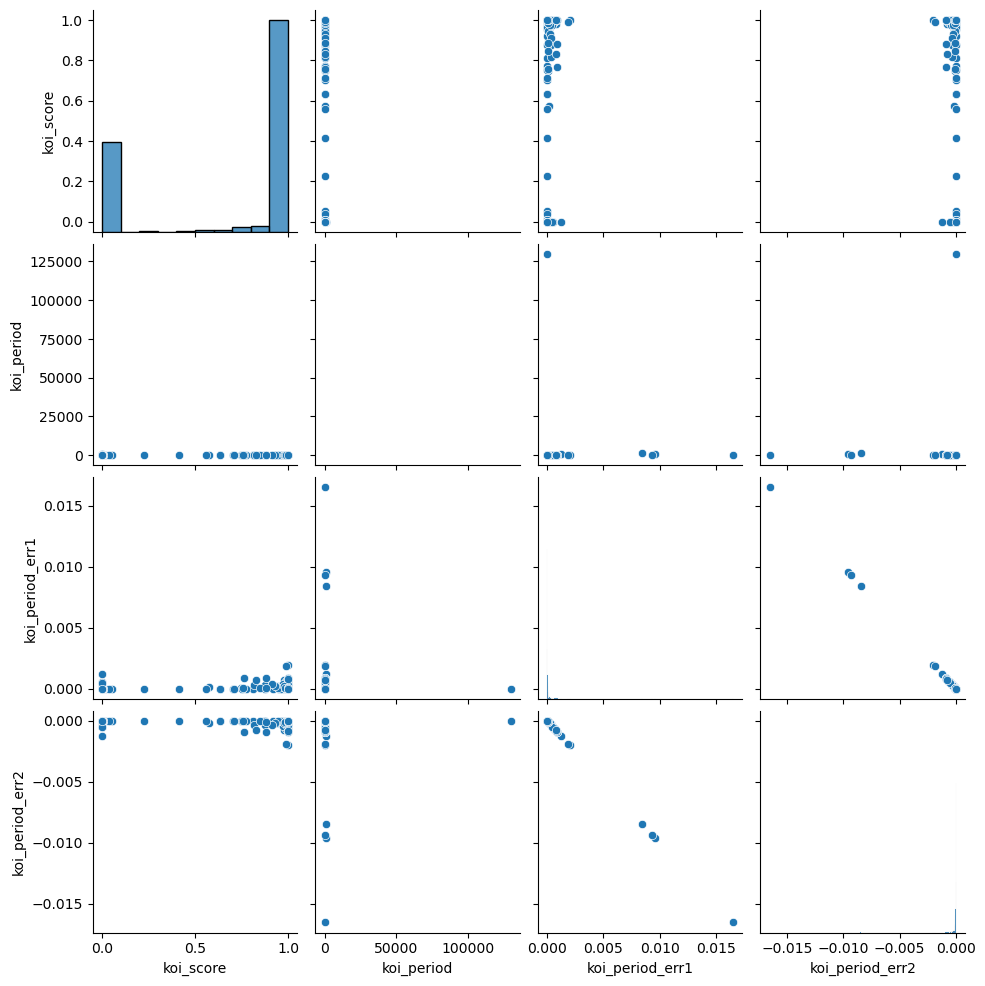

In [9]:
sns.pairplot(viz_data3)

### Cleaning

The data variables are split into categories on the NASA website. Underneath each catefory name we have entered the name of the list that contains the variable names belonging to this category.

KOI = "Kepler Object of Interest" <br>
KIC = "Kepler Input Catalog"

| Category | List Name | Description |
|:---------|:---------:|:------------|
|Identification Columns|id_vars|KOI Id and name|
|Exoplanet Archive Information|arch_vars|Archival records of KOI "dispositions" (classifications)|
|Project Disposition Columns|disp_vars|Kepler Project-informed "disposition" (classification) metadata|
|Transit Properties|tran_vars|Kepler Project derived features derived for classification assignment|
|Threshold-Crossing Event (TCE) Information|tce_vars|Features describing signal to noise ratio of measurements which are based on "planet transit" events.|
|Stellar Parameters|stel_vars|Describe star|
|KIC Parameters|kic_vars|Various brigtness measure of the star using differend bands in units of magnitude.|
|Pixel-Based KOI Vetting Statistics|pix_vars|Pixel level feature engineering to reduce transit false positives|

In [10]:
# Listing column names belonging to each category
id_vars = ["kepid", "kepoi_name"]

arch_vars = ["kepler_name", "koi_disposition", "koi_vet_stat", "koi_vet_date"]

disp_vars = ["koi_pdisposition", "koi_score", "koi_fpflag_nt",
             "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec",
             "koi_disp_prov", "koi_comment"]

tran_vars = ["koi_period", "koi_time0bk", "koi_time0", "koi_eccen",
             "koi_longp", "koi_impact", "koi_duration", "koi_ingress",
             "koi_depth", "koi_ror", "koi_srho", "koi_fittype", 
             "koi_prad", "koi_sma", "koi_incl", "koi_teq", "koi_insol",
             "koi_dor", "koi_limbdark_mod", "koi_ldm_coeff1",
             "koi_ldm_coeff2", "koi_ldm_coeff3", "koi_ldm_coeff4",
             "koi_parm_prov"]

tce_vars = ["koi_max_sngle_ev", "koi_max_mult_ev", "koi_model_snr",
            "koi_count", "koi_num_transits", "koi_tce_plnt_num",
            "koi_tce_delivname", "koi_quarters", "koi_trans_mod",
            "koi_model_dof", "koi_model_chisq", "koi_datalink_dvr",
            "koi_datalink_dvs"]

stel_vars = ["koi_steff", "koi_slogg", "koi_smet", "koi_srad",
             "koi_smass", "koi_sage", "koi_sparprov"]

kic_vars = ["ra", "dec", "koi_kepmag", "koi_gmag", "koi_rmag",
            "koi_imag", "koi_zmag", "koi_jmag", "koi_hmag", "koi_kmag"]

pix_vars = ["koi_fwm_sra", "koi_fwm_sdec", "koi_fwm_sdec", 
            "koi_fwm_srao", "koi_fwm_sdeco", "koi_fwm_prao",
            "koi_fwm_pdeco", "koi_fwm_stat_sig", "koi_dicco_mra",
            "koi_dicco_mdec", "koi_dicco_msky", "koi_dikco_mra",
            "koi_dikco_mdec", "koi_dikco_msky"]

## Model Building

In [11]:
replace_map = {'CANDIDATE':1, 'FALSE POSITIVE':0}

nasa_data.koi_pdisposition=nasa_data.koi_pdisposition.map(replace_map)

In [12]:
#Removing koi_tce_delivname, "koi_tce_plnt_num"
data_vars = ["koi_max_sngle_ev", "koi_max_mult_ev", "koi_model_snr",
            "koi_count", "koi_num_transits",
            "koi_quarters", "koi_trans_mod",
            "koi_model_dof", "koi_model_chisq", "koi_datalink_dvr",
            "koi_datalink_dvs", "koi_steff", "koi_slogg", "koi_smet", "koi_srad",
             "koi_smass", "koi_sage", "koi_sparprov", "ra", "dec", "koi_kepmag", "koi_gmag", "koi_rmag",
            "koi_imag", "koi_zmag", "koi_jmag", "koi_hmag", "koi_kmag", "koi_fwm_sra", "koi_fwm_sdec", "koi_fwm_sdec", 
            "koi_fwm_srao", "koi_fwm_sdeco", "koi_fwm_prao",
            "koi_fwm_pdeco", "koi_fwm_stat_sig", "koi_dicco_mra",
            "koi_dicco_mdec", "koi_dicco_msky", "koi_dikco_mra",
            "koi_dikco_mdec", "koi_dikco_msky"]

x = [col for col in nasa_data.columns if col in data_vars]
y = [col for col in nasa_data.columns if col in tran_vars]

#store = nasa_data["koi_pdisposition"]

nasa_standard = nasa_data

#nasa_standard = (nasa_data - nasa_data.mean())/nasa_data.std()

#nasa_standard.koi_pdisposition=store

X = nasa_standard[x]
mean = X.mean()
std = X.std()
X = (X-mean)/std
X['koi_pdisposition'] = nasa_data.koi_pdisposition

In [13]:
X
XD = X.dropna()
XD

,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_pdisposition
0,-0.281595,-0.316020,0.362554,-0.130845,-0.026420,1.202701,0.781259,1
1,-0.294161,-0.316020,0.362554,-0.130845,-0.026420,1.202701,0.781259,1
2,-0.230703,0.183441,0.540545,-0.140474,1.037343,1.200612,0.845498,0
3,0.308750,0.123205,0.586777,-0.153041,-1.369000,1.242565,0.961706,0
4,-0.275186,0.406819,0.295519,-0.111423,-0.693417,1.226179,0.898189,1
...,...,...,...,...,...,...,...,...
9559,-0.316025,-0.086368,-0.032724,-0.104569,1.403299,0.878285,0.154025,0
9560,0.243030,-0.086368,0.505872,-0.134762,1.075929,0.911737,-0.131803,0
9561,-0.313261,0.517252,0.309388,-0.113871,-1.164504,0.931008,0.355404,1
9562,-0.311125,0.585019,0.316323,-0.112239,0.441552,0.934635,0.808687,0


In [14]:
X

,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_pdisposition
0,-0.281595,-0.316020,0.362554,-0.130845,-0.026420,1.202701,0.781259,1
1,-0.294161,-0.316020,0.362554,-0.130845,-0.026420,1.202701,0.781259,1
2,-0.230703,0.183441,0.540545,-0.140474,1.037343,1.200612,0.845498,0
3,0.308750,0.123205,0.586777,-0.153041,-1.369000,1.242565,0.961706,0
4,-0.275186,0.406819,0.295519,-0.111423,-0.693417,1.226179,0.898189,1
...,...,...,...,...,...,...,...,...
9559,-0.316025,-0.086368,-0.032724,-0.104569,1.403299,0.878285,0.154025,0
9560,0.243030,-0.086368,0.505872,-0.134762,1.075929,0.911737,-0.131803,0
9561,-0.313261,0.517252,0.309388,-0.113871,-1.164504,0.931008,0.355404,1
9562,-0.311125,0.585019,0.316323,-0.112239,0.441552,0.934635,0.808687,0


In [17]:
# Matrix version of the model

with pm.Model() as logistic_model:
    Y = XD.koi_pdisposition
    X = XD[x]
    k =  X.shape[1]
    α = pm.Normal('α', mu=0, sigma=100)
    # Beta coefficients for predictor variables & priors
    β = pm.MvNormal('β', mu=np.zeros(k), cov=100*np.eye(k), shape=k)
    μ = α + pm.math.dot(X,β)
    p = pm.Deterministic('p',  pm.invlogit(μ))
    # Model error
    #sigma_y = pm.Uniform('sigma_y', lower=0, upper=100)

    Yl = pm.Bernoulli('Yl', p=p, observed=Y)
    #Yl = pm.Normal('Yl', mu=μ, sd=sigma_y, observed=Y)
    binout = pm.sample(1000, tune=2000) #init="adapt_diag"
    
#pm.model_to_graphviz(logistic_model)
#logistic_model.check_test_point()
#Xlog = 1/(1+np.exp(-1*X))
#Xlog

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 104 seconds.


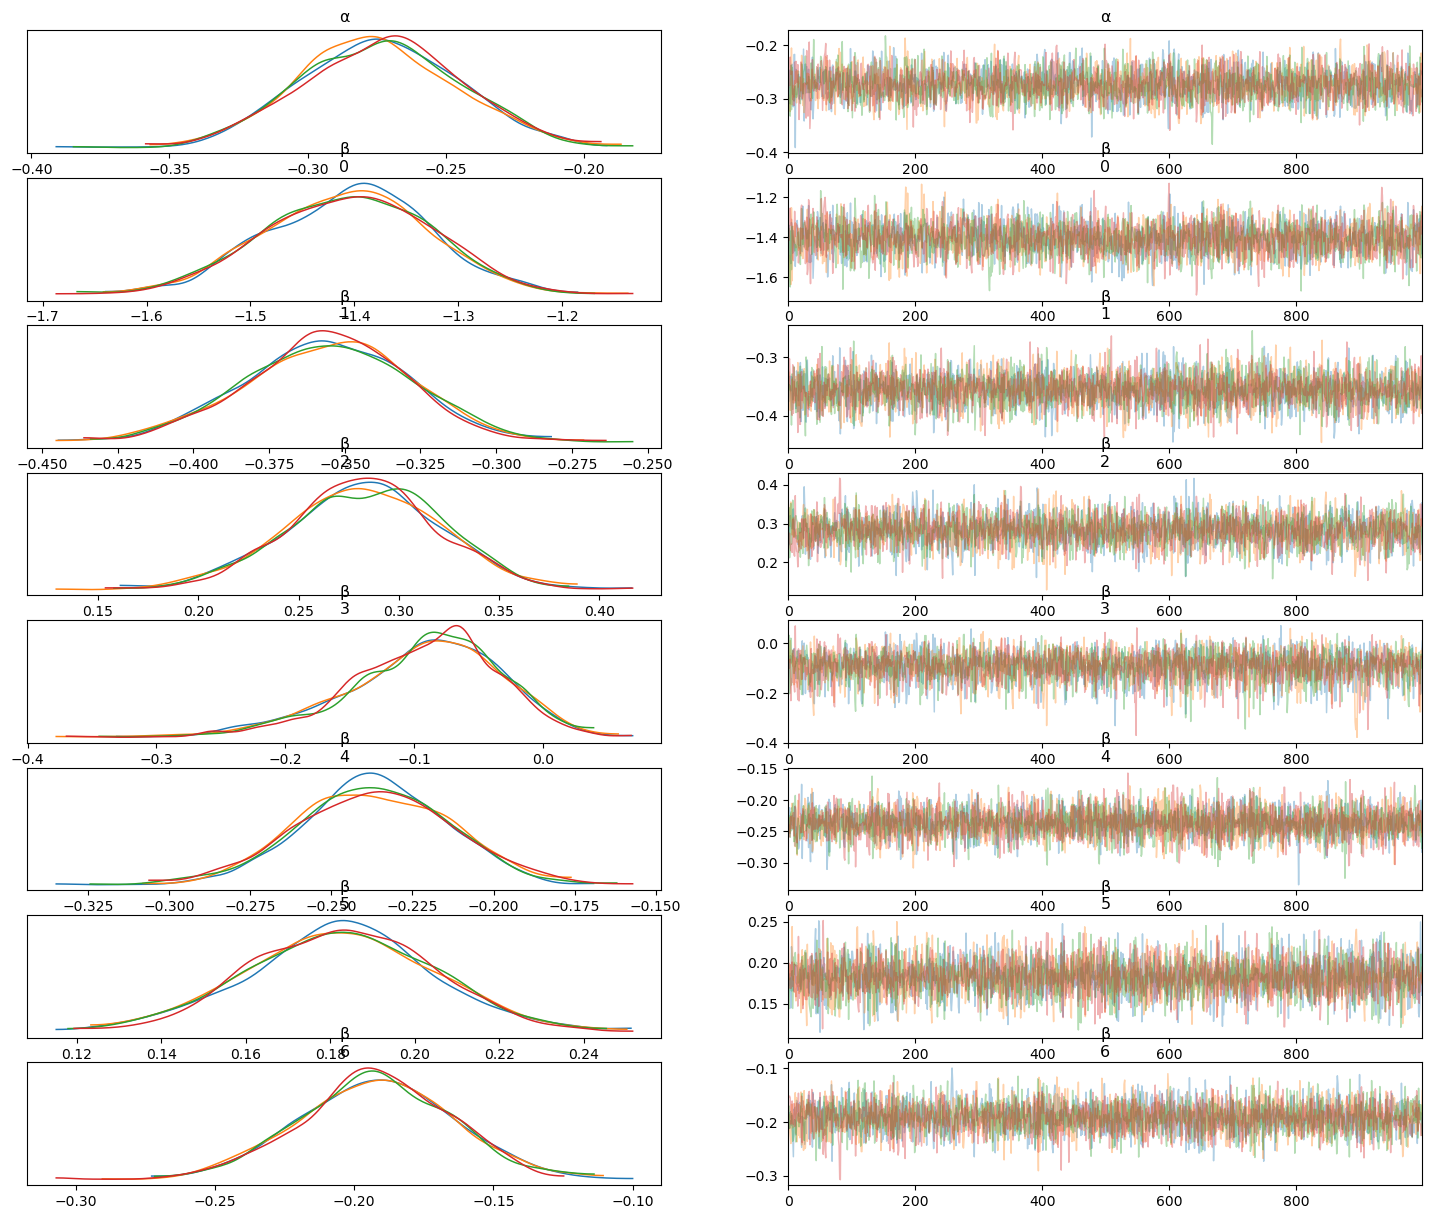

In [18]:
az.plot_trace(binout, compact = False, var_names = ['α','β'], figsize = (18,15));

In [19]:
# summary statistics on the posterior distributions

az.summary(binout, var_names = ['α', 'β'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.274,0.029,-0.328,-0.221,0.000,0.000,4432.0,3393.0,1.0
β[0],-1.407,0.080,-1.552,-1.256,0.001,0.001,3833.0,3174.0,1.0
β[1],-0.356,0.027,-0.407,-0.304,0.000,0.000,5895.0,3031.0,1.0
β[2],0.282,0.038,0.211,0.355,0.001,0.000,4405.0,3348.0,1.0
β[3],-0.092,0.060,-0.207,0.015,0.001,0.001,4463.0,2946.0,1.0
β[4],-0.237,0.023,-0.280,-0.194,0.000,0.000,5925.0,3036.0,1.0
β[5],0.182,0.022,0.140,0.224,0.000,0.000,6352.0,3043.0,1.0
β[6],-0.192,0.027,-0.244,-0.141,0.000,0.000,5626.0,3459.0,1.0


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

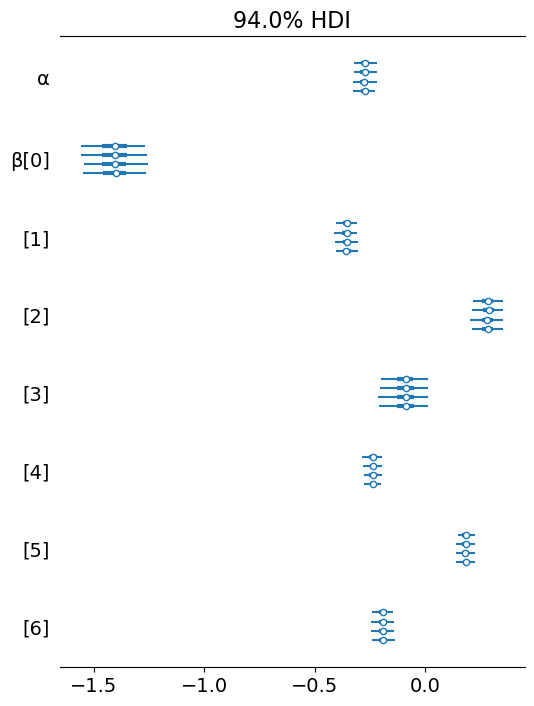

In [20]:
az.plot_forest(binout, var_names=['α', 'β'])

c:\Users\jrkar\anaconda3\envs\pymc_env\lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (9208) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'β\n0'}>,
        <AxesSubplot:title={'center':'β\n1'}>,
        <AxesSubplot:title={'center':'β\n2'}>],
       [<AxesSubplot:title={'center':'β\n3'}>,
        <AxesSubplot:title={'center':'β\n4'}>,
        <AxesSubplot:title={'center':'β\n5'}>,
        <AxesSubplot:title={'center':'β\n6'}>],
       [<AxesSubplot:title={'center':'p\n0'}>,
        <AxesSubplot:title={'center':'p\n1'}>,
        <AxesSubplot:title={'center':'p\n2'}>,
        <AxesSubplot:title={'center':'p\n3'}>],
       [<AxesSubplot:title={'center':'p\n4'}>,
        <AxesSubplot:title={'center':'p\n5'}>,
        <AxesSubplot:title={'center':'p\n6'}>,
        <AxesSubplot:title={'center':'p\n7'}>],
       [<AxesSubplot:title={'center':'p\n8'}>,
        <AxesSubplot:title={'center':'p\n9'}>,
        <AxesSubplot:title={'center':'p\n10'}>,
        <AxesSubplot:title={'center':'p\n11'}>],
       [<AxesSubplot:title={'center':'p\n12'}>,
        

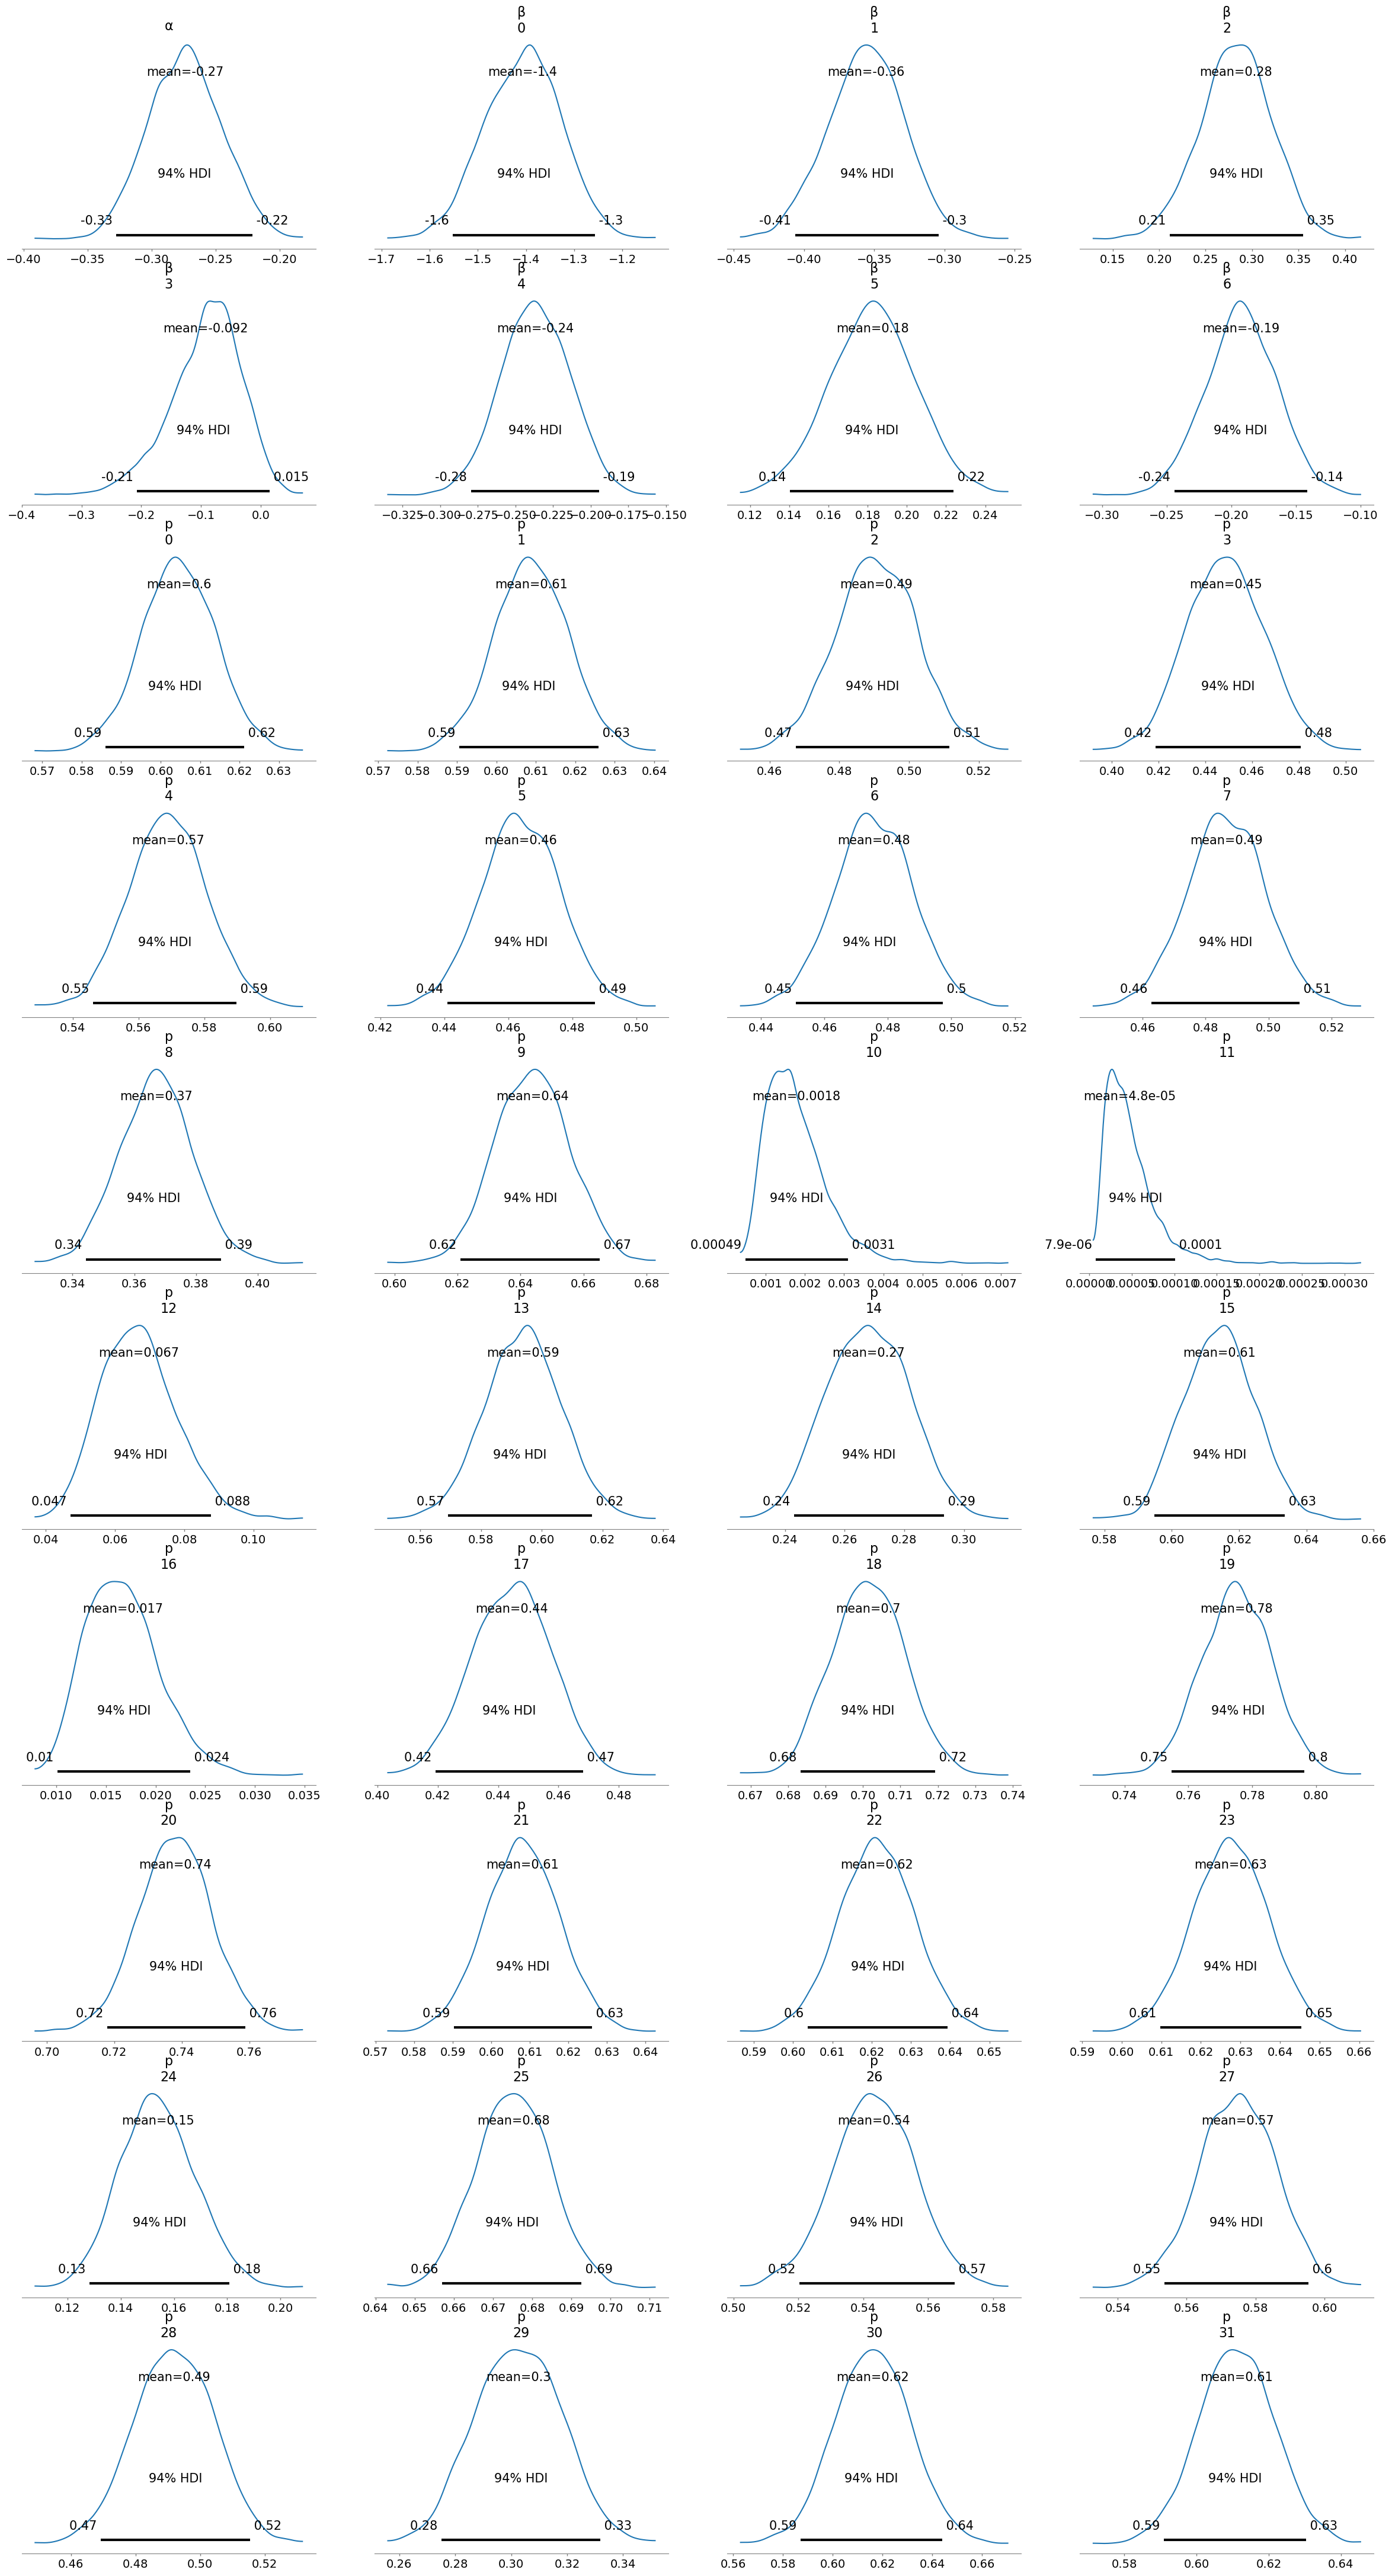

In [21]:
az.plot_posterior(binout)

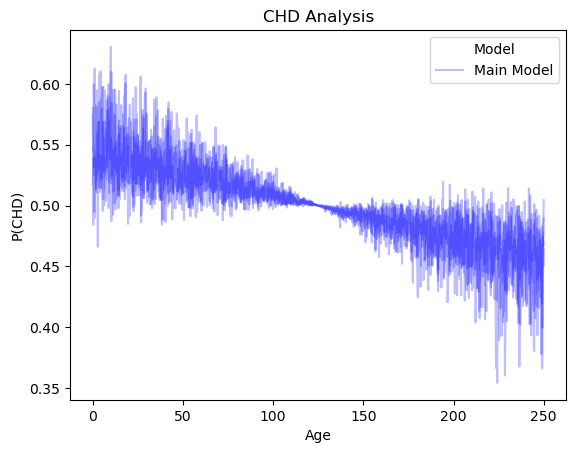

In [36]:
# Plot of the models
# models = ['main','simple']
colors = ['blue', 'green']
shape = binout.posterior['α'].shape
x = np.linspace(-2, 2, shape[1])
x = np.array(x)
z = np.broadcast_to(x, shape)
Age = np.linspace(0,250, shape[1])

main_post = 1/(1 + np.exp(-binout.posterior['β'][:,:,3]*z))
out =[]
for i in range(4):
    out.append(main_post[i,:])
    if i == 0:
        plt.plot(Age,out[i], color = 'blue', label = 'Main Model', alpha = .25)
    else:
        plt.plot(Age,out[i], color = 'blue',alpha = .25)
        
plt.title("CHD Analysis")
plt.xlabel("Age") 
plt.ylabel("P(CHD)")#, title="Binomial regression")
plt.legend(title ="Model")

Text(0, 0.5, 'P(Exo)')

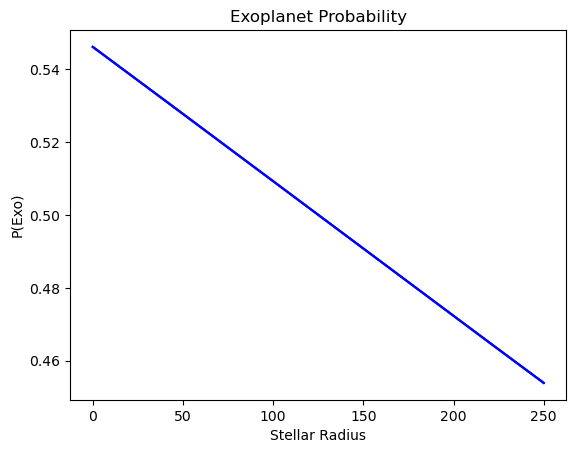

In [34]:
# Plot of the models
# models = ['main','simple']
colors = ['blue', 'green']
shape = binout.posterior['α'].shape
x = np.linspace(-2, 2, shape[1])
x = np.array(x)
z = np.broadcast_to(x, shape)
Koi_Srad = np.linspace(0,250, shape[1])

trace_mean = binout.posterior['β'][:,:,3].mean()
main_post = 1/(1 + np.exp(-np.dot(trace_mean,z)))
out =[]
for i in range(4):
    out.append(main_post[i,:])
    if i == 0:
        plt.plot(Koi_Srad,out[i], color = 'blue', label = 'Main Model', alpha = .75)
    else:
        plt.plot(Koi_Srad,out[i], color = 'blue',alpha = .75)

plt.title("Exoplanet Probability")
plt.xlabel("Stellar Radius") 
plt.ylabel("P(Exo)")#, title="Binomial regression")